In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
import math

### Create 1 feature Linear dataset 

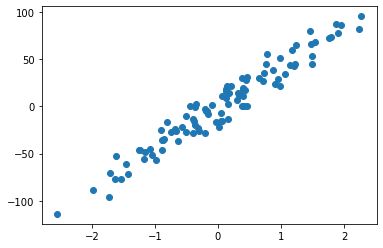

In [2]:
np.random.seed(0)
x, y = make_regression(n_samples = 100 , n_features = 1 , noise = 10)
plt.scatter(x,y)

### Make the model with sklearn

In [3]:
model = SGDRegressor(max_iter=1000 , eta0=0.001)
model.fit(x,y)

SGDRegressor(eta0=0.001)

Coeff R2 =  0.9416567569675361


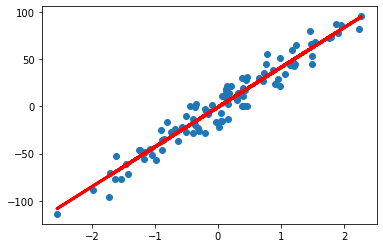

In [4]:
print('Coeff R2 = ' , model.score(x,y))
plt.scatter(x,y)
plt.plot(x , model.predict(x) , c='red' , lw = 3)

### Make the model by my self without gradient descent

In [5]:
y = y.reshape(len(y) , -1)

In [6]:
def cov(x , y):
    return (1/len(x))* np.sum((x - np.mean(x))*(y - np.mean(y)))

In [7]:
def corr(x,y):
    return cov(x,y)/math.sqrt(np.var(x) * np.var(y))

In [8]:
def parametre(x, y):
    a = cov(x,y)/np.var(x)
    b = np.mean(y) - a*np.mean(x)
    return (a,b)

In [9]:
def R2(y_predi , y):
    return corr(y_predi,y)**2

0.9417294727711081
parametre :  42.619430291366946 -0.8141818270307257


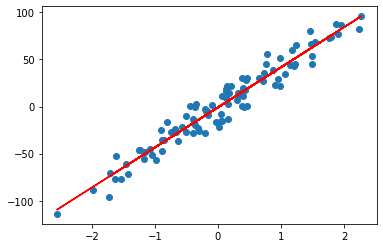

In [10]:
plt.scatter(x,y)
a, b = parametre(x,y)
plt.plot(x,a*x+b , c = 'red')
print(R2(a*x+b,y))
print("parametre : ",a ,b)

### Make the model by my self with gradient descent

In [11]:
# theta est le vecteur contenant a et b

In [12]:
def model(X, parametre):
 # x shape: (m, n)
 # theta shape: (n,1)
    return X.dot(parametre) #shape: (m, 1)

In [13]:
def cost_function(X, y, parametre):
    m = len(y)
    J = 1/(2*m) * np.sum((model(X, parametre) - y)**2)
    return J

In [14]:
def gradient(X, y, parametre):
    m = len(y)
    return 1/m * X.T.dot((X.dot(parametre) - y))

In [15]:
def gradient_descent(X , y , parametre , learning_rate = 0.001 , niter = 1000):
    m = len(y)
    cost_history = np.zeros(niter)
    parametre_history = np.zeros((niter , 2))
    
    for i in range(0 , niter):
        predict = model(X , parametre)
        parametre = parametre - learning_rate * gradient(X , y , parametre)
        cost_history[i] = cost_function(X , y , parametre)
        parametre_history[i,: ] = parametre.T
    return parametre , cost_history , parametre_history

In [16]:
def regression(x , y , learning_rate = 0.001 , niter = 1000):
    X = np.hstack((np.ones(x.shape), x)) # permet de faire ax + 1b
    parametre = np.random.randn(2,1) # parametre en colonne
    parametre , cost_history , parametre_history = gradient_descent(X , y , parametre , learning_rate , niter)
    
    print("R2 = " , R2(parametre[0]*x+parametre[1] , y))
    fig,ax = plt.subplots(figsize = (12,8))
    ax.set_xlabel('Itérations')
    _=ax.plot(range(niter) , cost_history)
    
    fig,ax = plt.subplots(figsize=(12,8))
    _=ax.plot(x, y, 'b.')
    for i in range(niter):
        _=ax.plot(x, model(X, parametre_history[i]), lw=1)

R2 =  0.9417294727711087


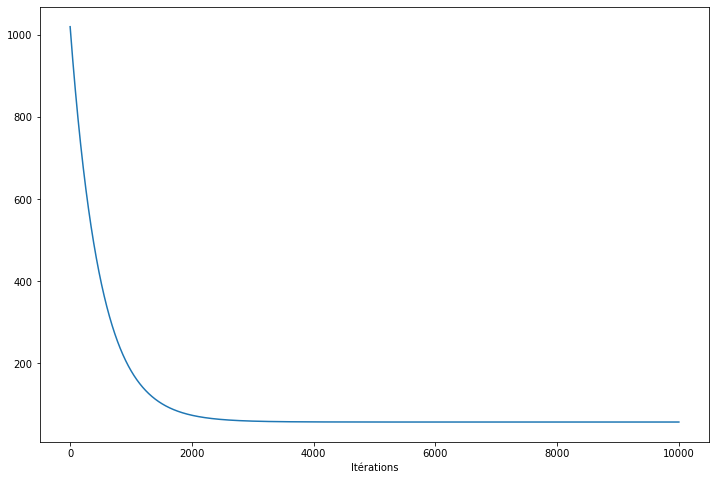

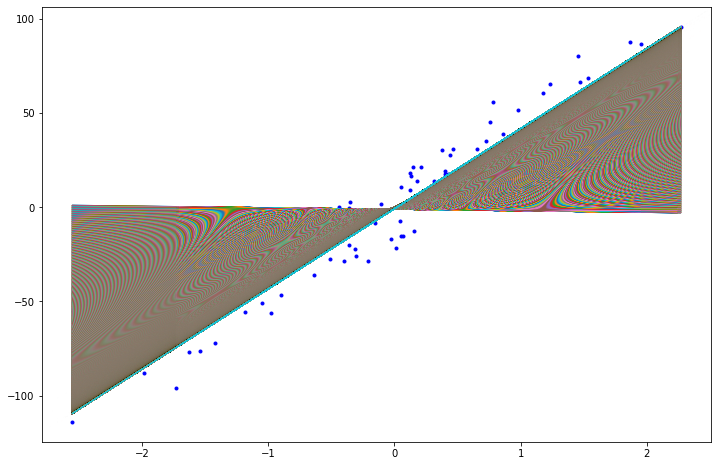

In [17]:
regression(x,y , 0.001, 10000)

R2 =  0.9417294727711081


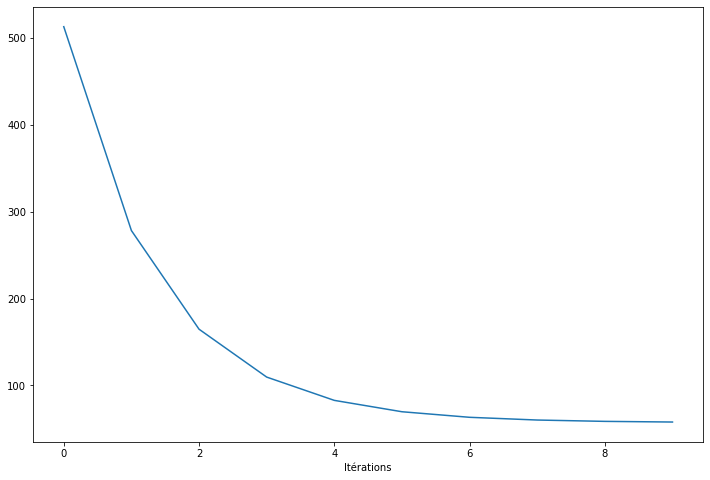

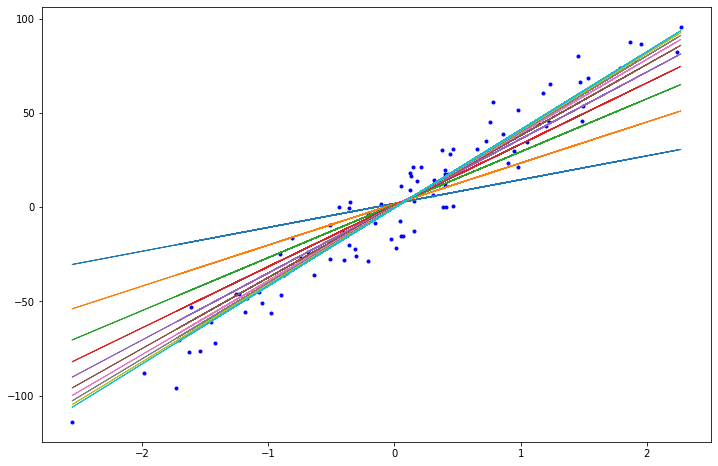

In [18]:
regression(x,y,0.3 , 10)